### **Plotting in Python using matplotlib.pyplot**

<font color="red">File access required:</font> In Colab this notebook requires first uploading files **Cities.csv**, **Countries.csv**, **Players.csv**, and **Teams.csv** using the *Files* feature in the left toolbar. If running the notebook on a local computer, simply ensure these files are in the same workspace as the notebook.

In [1]:
# Set-up
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Plotting from Python data structures

In [2]:
# Read Cities.csv and Countries.csv into lists of dictionaries
citiesList = []
with open('Cities.csv') as f:
    rows = csv.DictReader(f)
    for r in rows:
        citiesList.append(dict(r))
countriesList = []
with open('Countries.csv') as f:
    rows = csv.DictReader(f)
    for r in rows:
        countriesList.append(dict(r))

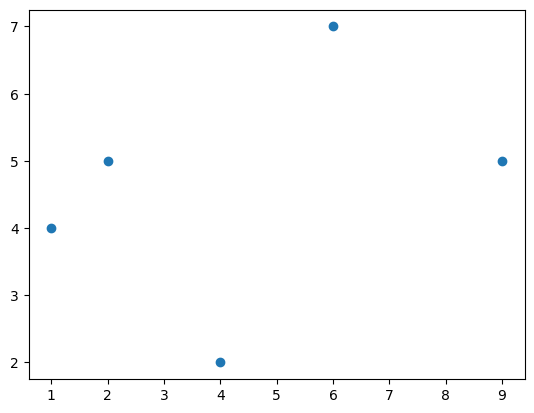

In [3]:
# Introduction to scatterplots
x = [1, 2, 4, 6, 9]
y = [4, 5, 2, 7, 5]
plt.scatter(x, y)
plt.show()

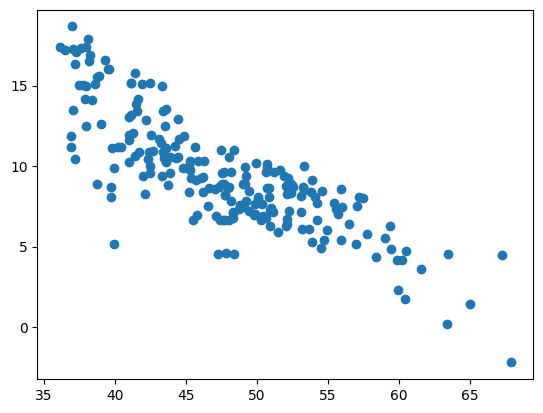

In [4]:
# Scatterplot of temperature (y) versus latitude (x)
x = []
y = []
for city in citiesList:
    x.append(float(city['latitude']))
    y.append(float(city['temperature']))
plt.scatter(x, y)
plt.show()
# Add labels to axes
# plt.xlabel('latitude')
# plt.ylabel('temperature')

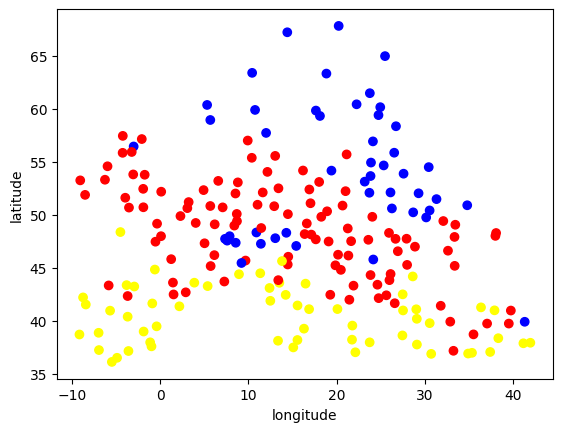

In [5]:
# Scatterplot of latitude (y) versus longitude (x) colored by temperature
x = []
y = []
colors = []
for city in citiesList:
    x.append(float(city['longitude']))
    y.append(float(city['latitude']))
    if float(city['temperature']) < 7:
        colors.append('blue')
    elif float(city['temperature']) < 11:
        colors.append('red')
    else: colors.append('yellow')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.scatter(x, y, c=colors)
plt.show()

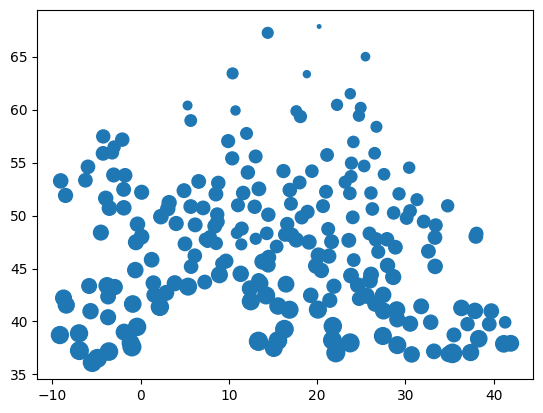

In [6]:
# Scatterplot of latitude (y) versus longitude (x) sized by temperature
x = []
y = []
size = []
for city in citiesList:
    x.append(float(city['longitude']))
    y.append(float(city['latitude']))
    size.append((float(city['temperature'])+3)*8) # +3 to avoid negative numbers
plt.scatter(x, y, size)
plt.show()

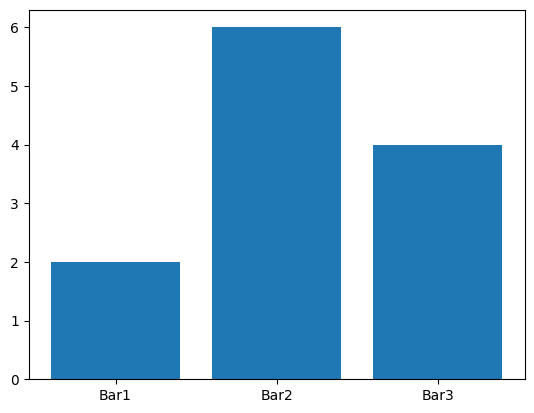

In [7]:
# Introduction to bar charts
bars = ['Bar1', 'Bar2', 'Bar3']
heights = [2, 6, 4]
plt.xticks([0,1,2], bars)
plt.bar([0,1,2], heights)
plt.show()

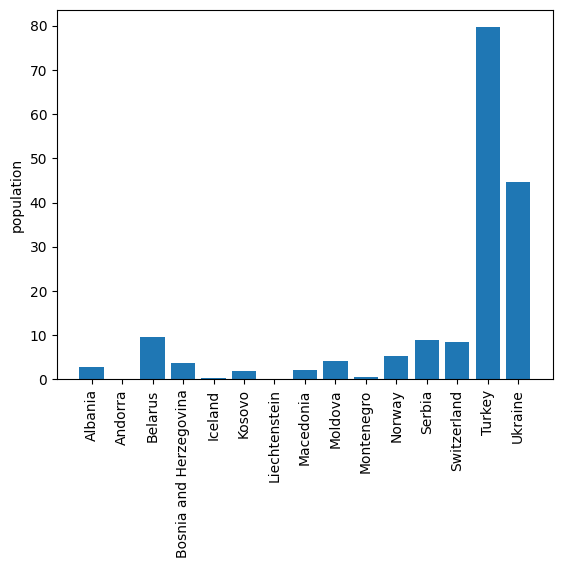

In [8]:
# Bar chart showing populations of non-EU countries
bars = []
heights = []
for country in countriesList:
    if country['EU'] == 'no':
        bars.append(country['country'])
        heights.append(float(country['population']))
ticks = list(range(len(bars))) # produces [0,1,...,n-1] for n bars
# print(ticks)
plt.xticks(ticks, bars, rotation='vertical')
plt.bar(ticks, heights)
plt.ylabel('population')
plt.show()

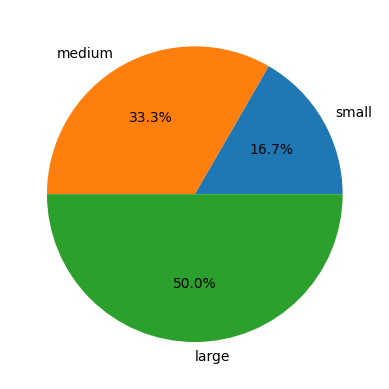

In [9]:
# Introduction to pie charts
sizes = [10, 20, 30]
lbls = ['small', 'medium', 'large']
plt.pie(sizes, labels=lbls, autopct='%1.1f%%')
plt.show()

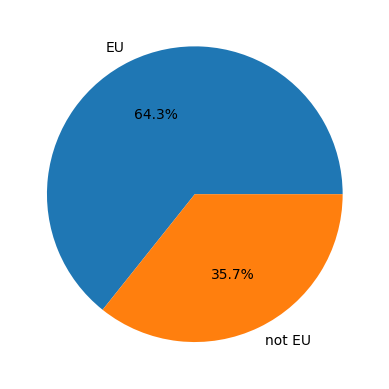

In [10]:
# Pie chart showing number of EU countries versus non-EU countries
numEU = 0
numNotEU = 0
for country in countriesList:
    if country['EU'] == 'yes': numEU += 1
    else: numNotEU +=1
plt.pie([numEU, numNotEU], labels=['EU','not EU'], autopct='%1.1f%%')
plt.show()

### Plotting from pandas dataframes

In [11]:
# Read Cities.csv and Countries.csv into dataframes
f = open('Cities.csv')
citiesDF = pd.read_csv(f)
f = open('Countries.csv')
countriesDF = pd.read_csv(f)

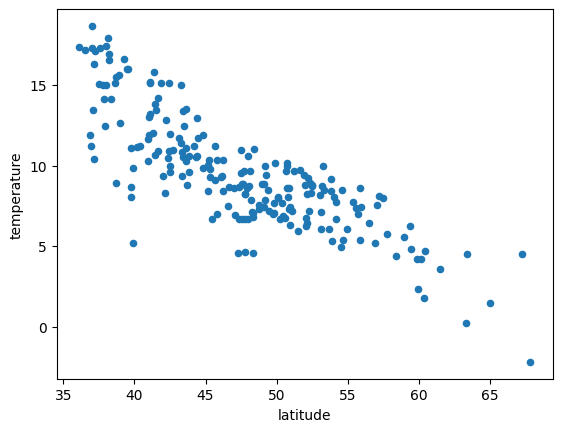

In [12]:
# Scatterplot of temperature (y) versus latitude (x)
citiesDF.plot.scatter('latitude', 'temperature')
plt.show()

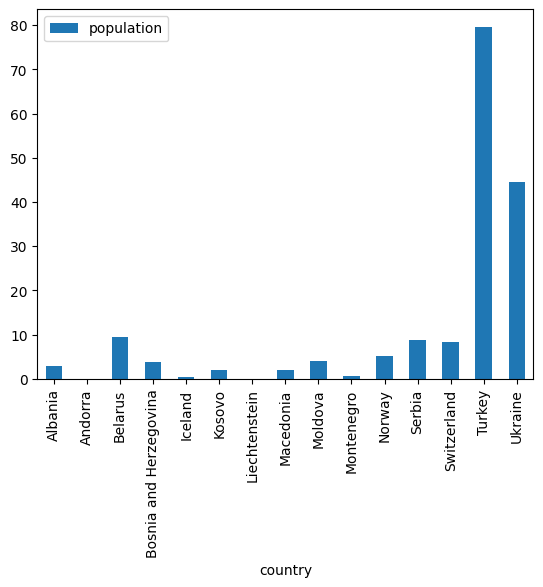

In [13]:
# Bar chart showing populations of non-EU countries
countriesDF[countriesDF.EU == 'no'].plot.bar('country', 'population')
plt.show()

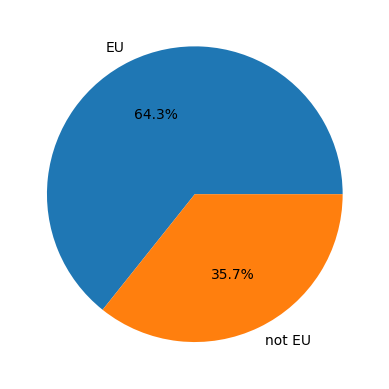

In [14]:
# Pie chart showing number of EU countries versus non-EU countries
# No convenient plotting direct from dataframe
numEU = len(countriesDF[countriesDF.EU == 'yes'])
numNotEU = len(countriesDF[countriesDF.EU == 'no'])
plt.pie([numEU, numNotEU], labels=['EU','not EU'], autopct='%1.1f%%')
plt.show()

### <font color="green">**Your Turn: World Cup Data**</font>

In [15]:
# Read Players.csv and Teams.csv into data structures and dataframes
# Use whichever one you prefer for plotting
# Lists of dictionaries
playersList = []
with open('Players.csv') as f:
    rows = csv.DictReader(f)
    for r in rows:
        playersList.append(dict(r))
teamsList = []
with open('Teams.csv') as f:
    rows = csv.DictReader(f)
    for r in rows:
        teamsList.append(dict(r))
# Dataframes
f = open('Players.csv')
playersDF = pd.read_csv(f)
f = open('Teams.csv')
teamsDF = pd.read_csv(f)

#####*For each problem, use plain python (playersList and teamsList) or pandas (playersDF and teamsDF), whichever you think will work best.*

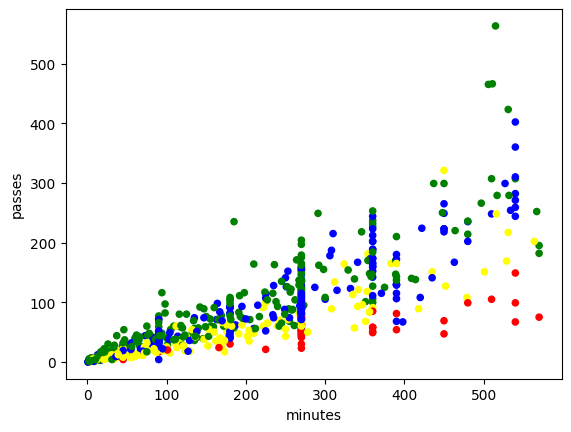

In [22]:
# Create a scatterplot of players showing passes made (y-axis)
# versus minutes played (x-axis). Color each player based on their
# position (goalkeeper, defender, midfielder, forward).
colors = []
for player in playersList:
    if player['position'] == 'goalkeeper': colors.append('red')
    elif player['position'] == 'defender': colors.append('blue')
    elif player['position'] == 'midfielder': colors.append('green')
    else: colors.append('yellow')

scatterplot = playersDF.plot.scatter('minutes', 'passes', c=colors)
plt.show()

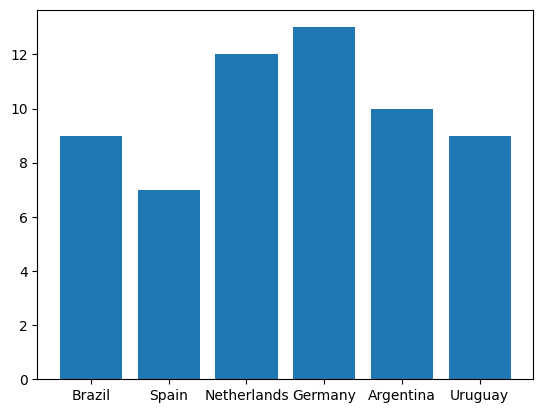

In [38]:
# Create a bar chart showing the number of goalsFor made by teams
# with more than two wins
plt.bar(teamsDF[teamsDF.wins > 2].team, teamsDF[teamsDF.wins > 2].goalsFor)
plt.show()

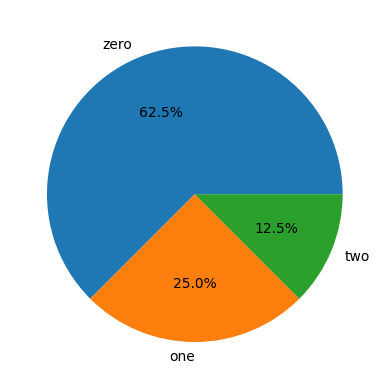

In [29]:
# Create a pie chart showing the relative percentage of teams with 0, 1, and 2
# red cards. Label the three pie slices 'zero', 'one', and 'two'.

redCards0 = len(teamsDF[teamsDF.redCards == 0])
redCards1 = len(teamsDF[teamsDF.redCards == 1])
redCards2 = len(teamsDF[teamsDF.redCards == 2])

plt.pie([redCards0, redCards1, redCards2], labels=['zero', 'one', 'two'], autopct='%1.1f%%')
plt.show()


### <font color="green">**Your Turn Extra: Titanic Data**</font>

<font color="red">File access required:</font> In Colab these extra problems require first uploading **Titanic.csv** using the *Files* feature in the left toolbar. If running the notebook on a local computer, simply ensure this file is in the same workspace as the notebook.

In [30]:
# Read Titanic.csv into data structure and dataframe
# Use whichever one you prefer for plotting
# List of dictionaries
titanicList = []
with open('Titanic.csv') as f:
    rows = csv.DictReader(f)
    for r in rows:
        titanicList.append(r)
# Dataframe
f = open('Titanic.csv')
titanicDF = pd.read_csv(f)

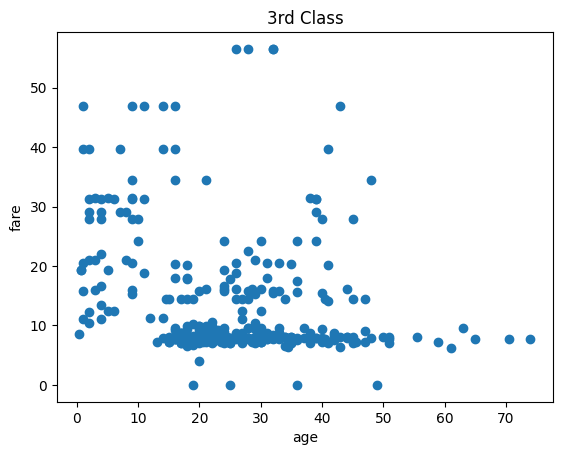

In [34]:
# For passengers in 3rd class, create a scatterplot of fare (y-axis)
# versus age (x-axis). Don't worry about missing ages.
# NOTE:'class' is a function in Pandas, so 'titanic.class' will generate
# an error; use 'titanic['class'] instead
titanicdf = titanicDF[titanicDF['class'] == 3]
plt.scatter(titanicdf['age'], titanicdf['fare'])
plt.title('3rd Class')
plt.xlabel('age')
plt.ylabel('fare')
plt.show()

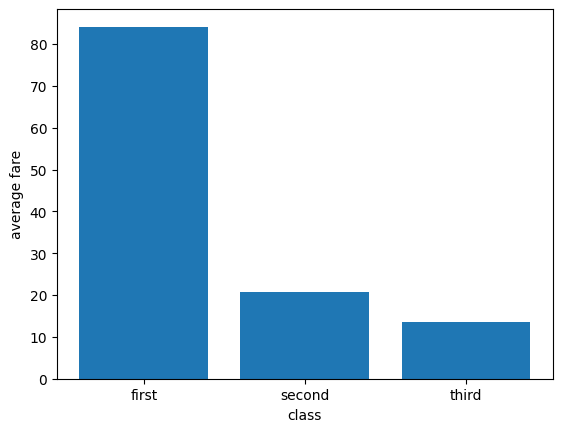

In [35]:
# Create a bar chart showing the average fare paid by passengers in each class.
# The three bars should be labeled 'first', 'second', 'third'.

avgclass1 = titanicDF[titanicDF['class'] == 1]['fare'].mean()
avgclass2 = titanicDF[titanicDF['class'] == 2]['fare'].mean()
avgclass3 = titanicDF[titanicDF['class'] == 3]['fare'].mean()

plt.bar(['first', 'second', 'third'], [avgclass1, avgclass2, avgclass3])
plt.xlabel('class')
plt.ylabel('average fare')
plt.show()

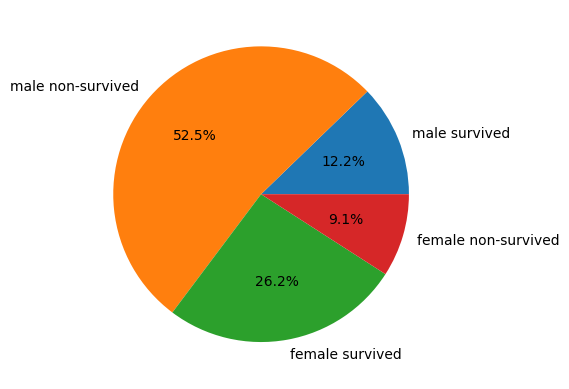

In [37]:
# Create a pie chart showing the relative number of male survivors, male
# non-survivors, female survivors, and female non-survivors (four slices).
maleSurvived = len(titanicDF[(titanicDF['gender'] == 'M') & (titanicDF['survived'] == 'yes')])
maleNonSurvived = len(titanicDF[(titanicDF['gender'] == 'M') & (titanicDF['survived'] == 'no')])
femaleSurvived = len(titanicDF[(titanicDF['gender'] == 'F') & (titanicDF['survived'] == 'yes')])
femaleNonSurvived = len(titanicDF[(titanicDF['gender'] == 'F') & (titanicDF['survived'] == 'no')])

plt.pie([maleSurvived, maleNonSurvived, femaleSurvived, femaleNonSurvived], labels=['male survived', 'male non-survived', 'female survived', 'female non-survived'], autopct='%1.1f%%')
plt.show()